In [11]:
from madigan.environments import make_env
from madigan.utils.preprocessor import StackerDiscrete
from madigan.utils.config import make_config

import numpy as np
import matplotlib.pyplot as plt

In [91]:
config_sine = make_config("sineComp", assets=["sineC1"],
                          data_source_type="Synth",
                          data_source_config={
                            'freq':[3., 3., 1.],
                            'mu':[5., 5., 8],
                            'amp':[1., 1., 2],
                            'phase':[0., 0.5, 0.],
                            'dX':0.01,
                            "noise": 0.0},
                         )
env_sine = make_env(config_sine)

In [92]:
config_sine_add = make_config("sineComp", assets=["sineC1"],
                          data_source_type="SineAdder",
                          data_source_config={
                            'freq':[2.2, 4.1, 1., 3.],
                            'mu':[.6, 0.3, 2., 4.2],
                            'amp':[.5, 0.2, 0.4, 1.2],
                            'phase':[0., 1., 4., 0.],
                            'dX':0.01,
                            "noise": 0.0},
                         )
env_sine_add = make_env(config_sine_add)


In [93]:
config_sine_dyn1 = make_config("sineComp", assets=["sineC1"],
                          data_source_type="SineDynamic",
                          data_source_config={
                            'freqRange':[[.1, 40., 1], [.1, 10., 0.1]],
                            'muRange':[[2, 10., .2], [4., 8., 1]],
                            'ampRange':[[2, 10., .1], [3, 9, 1]],
                            'phase':[0., 0.],
                            'dX':0.01,
                            "noise": 5},
                         )
env_sine_dyn1 = make_env(config_sine_dyn1)

In [94]:
config_sine_dyn2 = make_config("sineComp", assets=["sineC1"],
                          data_source_type="SineDynamic",
                          data_source_config={
                           'freqRange':[[1, 4., .1], [1, 2., .1], [.05, .5, .01]],
                           'muRange':[[2, 10., .2], [4., 8., 1], [30., 50., 1]],
                           'ampRange':[[2, 10., .1], [3, 9, 1], [20., 30., 1]],
                           'phase':[0., 0., 0.],
                           'dX':0.01,
                           "noise": 0,}
                         )
env_sine_dyn2 = make_env(config_sine_dyn2)

In [95]:
config_sine_dyn3 = make_config("sineComp", assets=["sineC1"],
                          data_source_type="SineDynamic",
                          data_source_config={
                           'freqRange':[[.01, .04, .001], [.1, .2, .01], [.05, .5, .01]],
                           'muRange':[[.2, 1., .01], [.4, .8, .01], [.3, .5, .01]],
                           'ampRange':[[.2, 1., .01], [.3, .9, .01], [.2, .8, .01]],
                           'phase':[0., 0., 0.],
                           'dX':0.01,
                           "noise": .0,}
                         )
env_sine_dyn3 = make_env(config_sine_dyn3)

In [96]:
config_sine_trend = make_config("sineComp", assets=["sineC1"],
                              data_source_type="SineDynamicTrend",
                              data_source_config={
                                  'freqRange':[[1, 4, .01], [.01, .02, .001], [.05, .5, .01]],
                                  'muRange':[[.2, 1., .01], [.4, .8, .01], [.3, .5, .01]],
                                  'ampRange':[[.02, .1, .001], [.03, .09, .001], [.2, .8, .01]],
                                  'trendRange': [[200, 800]],
                                  'trendIncr': [0.002],
                                  'trendProb': [.001],
                                  'phase':[0., 0., 0.],
                                  'dX':0.01,
                                  "noise": 0,}
                         )
env_sine_trend = make_env(config_sine_trend)

In [97]:
env_sine.assets, env_sine_add.assets, env_sine_dyn1.assets, env_sine_dyn2.assets, env_sine_trend.assets

([sine_0, sine_1, sine_2],
 [multi_sine],
 [sine_dynamic],
 [sine_dynamic],
 [sine_dynamic_trend])

In [104]:
window_sine = StackerDiscrete(128, norm=False, n_assets=env_sine.nAssets)
window_sine_add = StackerDiscrete(128, n_assets=env_sine_add.nAssets)
window_sine_dyn1 = StackerDiscrete(1280, norm=True, n_assets=env_sine_dyn1.nAssets)
window_sine_dyn2 = StackerDiscrete(128, norm=True, n_assets=env_sine_dyn2.nAssets)
window_sine_dyn3 = StackerDiscrete(1280, norm=False, n_assets=env_sine_dyn3.nAssets)
window_sine_trend = StackerDiscrete(1280, norm=False, n_assets=env_sine_trend.nAssets)

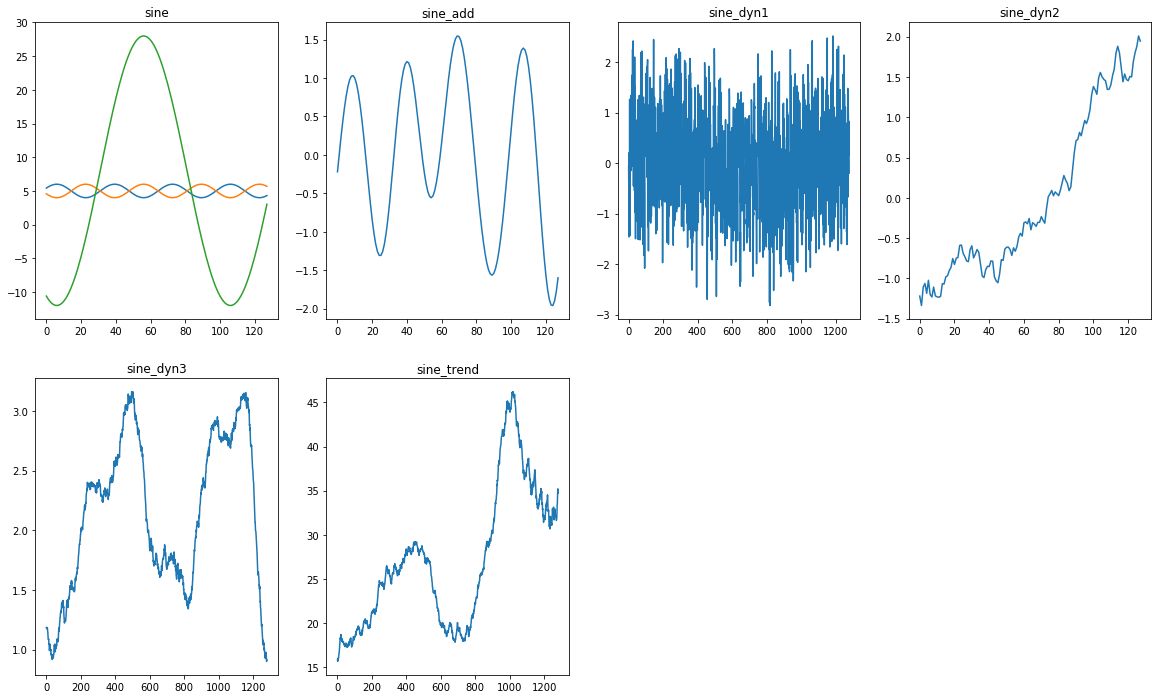

In [107]:
for window, env in zip((window_sine, window_sine_add, window_sine_dyn1, window_sine_dyn2, window_sine_dyn3, window_sine_trend),
                       (env_sine, env_sine_add, env_sine_dyn1, env_sine_dyn2, env_sine_dyn3, env_sine_trend)):
    window.reset_state()
    window.initialize_history(env)
    
fig, axes = plt.subplots(2,4, figsize=(20, 12))
for ax, (window, label) in zip(axes.flatten(), ((window_sine, "sine"), (window_sine_add, "sine_add"),
                                                (window_sine_dyn1, "sine_dyn1"), (window_sine_dyn2, "sine_dyn2"),
                                                (window_sine_dyn3, "sine_dyn3"),
                                                (window_sine_trend, "sine_trend"))):
    ax.plot(window.current_data().price, label=label)
    ax.set_title(label)
for ax in axes[1, 2:]:
    plt.delaxes(ax)

In [106]:
sine_dyn = env_sine_dyn.dataSource
[sine_dyn.getProcess(0) for i in range(1000)]

NameError: name 'env_sine_dyn' is not defined

In [1]:
window_sine_dyn.current_data().price

NameError: name 'window_sine_dyn' is not defined

In [8]:
data = window_ou.current_data().price
def ewm(data, alpha=0.99):
    curr = data[0]
    out = [curr]
    for dat in data[1:]:
        curr = (1-alpha)*curr + alpha*dat
        out.append(curr)
    return np.array(out)
        
plt.plot(data)
plt.plot(ewm(data, alpha=.1))


NameError: name 'window_ou' is not defined

In [8]:
window_trend_ou.current_data().price, env_trend_ou.currentPrices

NameError: name 'window_trend_ou' is not defined

In [76]:
import numba

@numba.njit
def trend_ou():
    x = 0.
    y = 1
    ema = y
    dx = 0.01
    dy = 0.001
    theta = 1
    phi = .5
    noise_var = 0.01
    emaAlpha = 0.9
    
    trending = False
    directions = np.array((-1, 1))
    current_direction = directions[1]
    noise = 0.05
    trend_len=0
    prev_y = y
    ou_noise = 0.
    ou_process = 0.
    while True:
#         prev_y = y
#         ema = emaAlpha*y + (1-emaAlpha)*ema
        if trending:
            y += y*dy*current_direction +  y*np.random.normal(0, noise_var)
            y = max(0.01, y)
            trend_len -= 1
            if trend_len == 0:
                trending=False
                prev_y = y
            if y <= 0.01:
                current_direction = 1
            
        else:
            ou_noise = y*phi*np.random.normal(0, noise)
            ou_process = theta*(prev_y-y)
#             print(ou_noise, ou_process, ou_noise+ou_process, y, prev_y)
            y += ou_process + ou_noise
            if np.random.random() < 0.001:
                trending = True
                current_direction = np.random.choice(directions)
                trend_len = np.random.randint(low=500, high=1500)
#         y += y * noise * np.random.normal(0., noise)
#         ou_noise = y*phi*np.random.normal(0, noise)
# #         ou_process = theta*((y+ou_noise)-y)
#         ou_process = theta*(y+ou_noise-prev_y)
#         ou_process = 0.
        trend_process = y
#         y += ou_process + ou_noise
        yield y, ema, ou_process, trend_process, prev_y, ou_noise
        

In [77]:
synth = iter(trend_ou())

Text(0.5, 1.0, 'ou process')

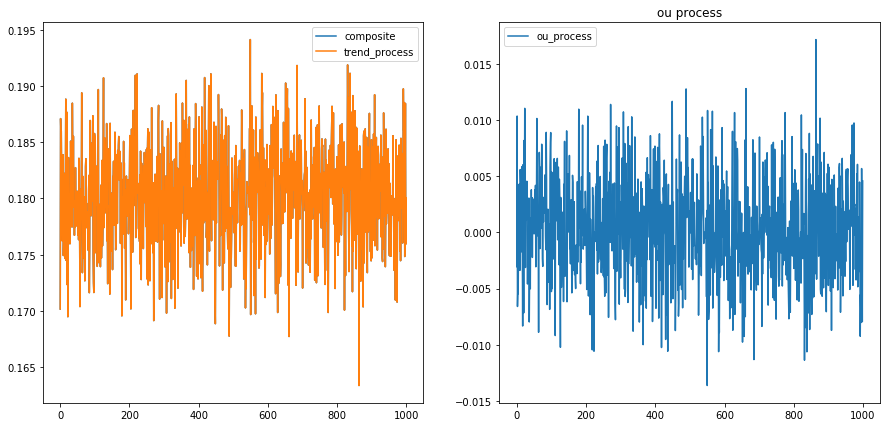

In [85]:
data = []
for i in range(1000):
    data.append(next(synth))
    
data = np.array(data)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].plot(data[:, 0], label="composite")
# ax[0].plot(data[:, 1], label="ema")
ax[0].plot(data[:, 3], label="trend_process")
# ax[0].plot(data[:, 4], label="prev_y")
ax[1].plot(data[:, 2], label="ou_process")
# ax[1].plot(data[:, 5], label="ou_noise")
ax[0].legend()
ax[1].legend()
ax[1].set_title('ou process')